# Trabalho 1 


### Nome: 



*   ## SEBASTIÃO





### Generalização dos metodos para o modelo multiclasse.



*   Temos que no modelo `Bayes Ingenuo`, assumimos que nosso vetor de atributos tem uma distribuição, por exemplo uma Normal da forma, $  X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$ , o que temos que o $d $, podendo ser uma vetor com mais de dois atribuições. Portanto a generalização para um multiclasse, não necessita de nenhuma alteração. No aspecto, da matriz de confunsão, vamos ter na diagonal principal teremos os casos de verdadeiros positivos, e abaixo da diagonal falsos negativos e acima falso positivos.



*   Temos que tanto no método do análise de discriminante linear e no análise de discriminante quadrático, ambos os modelos tempos agora por padrão que a os nossos atributos seguem uma normal multivariada, com isso assim como vimos no modelo Bayes, para a implimentação não teremos nenhuma diferença, porém assim como visto também acima, no cenário multiclasse, teremos métricas diferentes, serão vetores.



*   No modelo SVM, teremos que usar os métodos OVO e OVr, quando estamos interessados na classificação multiclasse. Os respectivos métodos atuam de diferentes formas. O primeiro atuará na forma que para cada par de classe, o classificador irá treinar um especifico para comparar somente as duas, assim reduzindo o número de classe até achar a classe correta para o certo atributo. Enquanto Ovr, diferente desse modo de treinar dois a dois, faz um treinamento de forma direta dentro da classe de tamanho N, e escolhe o que tem o maior score para certo atributo.








###### Bibliotecas importadas


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.exposure import rescale_intensity
from skimage.morphology import reconstruction
from skimage.feature import hog
from skimage import exposure
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import sklearn.metrics as sklm
from sklearn.naive_bayes import GaussianNB
from skimage import data, exposure
from sklearn.svm import LinearSVC
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import  GridSearchCV



In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
import sys
sys.path.append('drive/My Drive/Colab Notebooks/Redes_neurais/')

Mounted at /content/drive




*   Carregando os dados, as imagens do planeta Venûs. 




In [3]:
feat = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/features.csv',header = None)
resp = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/responses.csv')
feat_test = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/test_images.csv',header = None)
resp_test = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/test_labels.csv')



*   Podemos ver que as imagens vem no formato de dataframe, e será assim que iremos trabalhar.








In [4]:
feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12060,12061,12062,12063,12064,12065,12066,12067,12068,12069,12070,12071,12072,12073,12074,12075,12076,12077,12078,12079,12080,12081,12082,12083,12084,12085,12086,12087,12088,12089,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,95,101,99,103,95,86,96,89,70,104,115,96,89,102,109,108,102,104,95,91,100,99,97,100,107,109,98,98,94,98,102,87,82,94,105,93,102,107,98,105,...,101,95,105,103,74,88,106,111,90,96,101,90,97,102,97,106,108,107,93,74,106,115,107,102,91,103,111,105,116,117,111,107,92,89,103,99,117,116,118,96
1,91,92,91,89,92,93,96,101,107,104,92,81,76,83,88,93,91,92,93,90,83,81,79,84,86,87,92,93,94,94,87,83,95,96,94,91,93,96,93,87,...,95,91,91,89,88,90,88,93,95,106,113,116,108,94,92,96,99,92,87,89,105,119,121,116,111,113,112,103,101,103,103,92,93,95,98,105,104,100,90,81
2,87,70,72,74,84,78,93,104,106,106,94,79,96,88,86,89,98,94,76,78,91,96,86,71,82,76,72,81,90,84,81,70,75,91,81,81,92,94,79,97,...,86,80,83,93,94,91,90,94,96,78,88,95,121,108,88,87,89,100,99,88,107,108,101,88,95,81,57,84,89,92,84,71,95,102,94,80,91,80,84,90
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,101,114,104,103,81,94,108,96,79,113,113,114,112,107,110,112,98,76,84,97,99,95,68,97,91,97,96,83,100,106,94,81,89,84,80,90,92,80,88,96
4,114,118,124,119,95,118,105,116,123,112,110,113,119,112,105,121,117,125,136,141,120,120,129,135,132,124,109,126,113,110,106,107,113,116,123,101,99,89,81,101,...,105,116,114,103,114,109,113,126,110,84,92,111,114,125,122,109,113,111,121,119,103,114,118,118,108,111,109,100,101,105,116,113,102,93,109,104,106,117,111,115




*   Plotando algumas imagens:




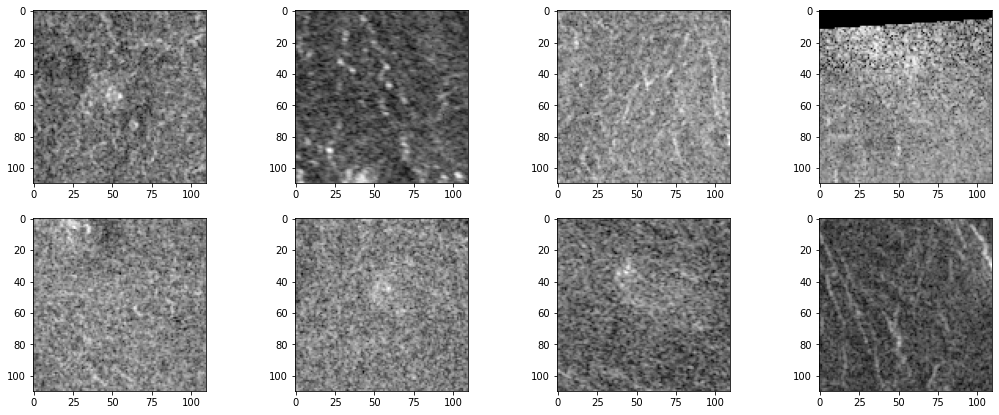

In [45]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(18, 7)
ind = 0

for ax in axs.flat:
    img = np.array(feat.iloc[ind]).reshape((110,110))
    ax.imshow(img, cmap = 'gray')
    ind += 1

In [5]:
feat = feat/255.0





## Parte 1.   Classificação binária.






Nesse primeiro momento, vamos estudar simplesmente o fato de se há ou nao vulcões na imagem. Para isso usaremos alguns classicadores do scikit learn.



*   Os primeiros classificadores que usaremos, serão `Naive Bayes Gaussian`, ` Liner Discriminant analusis` e `QuadraticDiscriminantAnalysis` respectivamente. Ambos os métodos tem em comum que assumen que os atributos seguem uma distribuição independente.



In [4]:
NB_clf = GaussianNB()
LDA_clf = LinearDiscriminantAnalysis()
QDA_clf = QuadraticDiscriminantAnalysis()

In [34]:
NB_clf.fit(feat, resp['Volcano?'])
LDA_clf.fit(feat, resp['Volcano?'])
QDA_clf.fit(feat, resp['Volcano?'])

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [35]:
print(NB_clf.score(feat_test,resp_test['Volcano?']))
print(LDA_clf.score(feat_test, resp_test['Volcano?']))
print(QDA_clf.score(feat_test, resp_test['Volcano?']))


0.3357717629846379
0.8942940746159473
0.6276517922457937




*   Percebemos que no score, o classicador `GaussianNB`, performou melhor em relação aos outros usados nessa célula. Mais adiante iremos avaliar outras metricas para que possamos inferir mais profundamente sobre os classicadores. 





*   Uma métrica que vamos avaliar, será a `Confusion Matrix`. Com essa matriz, teremos quatro informações, as quais serão basicamente, verdadeiro negativo, verdadeiro positivo, falso positivo e falso negativo. Para avaliar um bom classicador, usaremos o que terá o menor número de falso negativo, pois analisando o contexto em que estamos, sobre vulcões em Vênus, temos que seria extremamente ruim o classicador avaliar que não tem vulcão na imagem, porém ter ao menos um.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


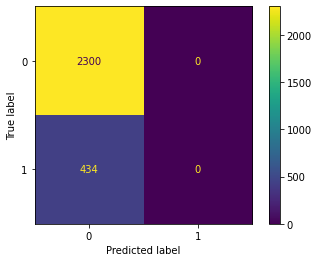

In [11]:
sklm.plot_confusion_matrix(NB_clf, feat_test, resp_test['Volcano?'])
plt.show()



*   Nessa matriz, percebemos um número relativamente alto de falso negativo, o que é bem ruim para gente.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


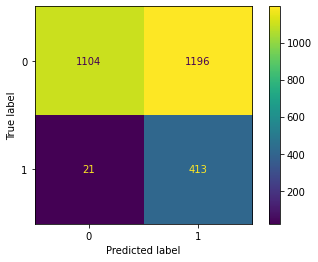

In [12]:
sklm.plot_confusion_matrix(LDA_clf, feat_test, resp_test['Volcano?'])
plt.show()



*   Agora no classicador `Linear Discriminant Analysis`, temos um número bem menor de falso positivo, o que é favoce no nosso conxteto.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


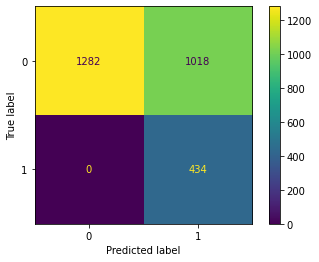

In [14]:
sklm.plot_confusion_matrix(QDA_clf, feat_test, resp_test['Volcano?'])
plt.show()




*   No `Quadratic Discriminant Analysis `, temos um classicador que erra bastante, porém apresenta um total de zero no quesito de falso negativo.





*   Outra métrica que é importante, nós avaliarmos é a ` F1 score`, essa medida atua basicamente como uma média harmonica com as taxas que são apresentadas na matriz de confusão.




In [39]:
y_test_pred_NB = NB_clf.predict(feat_test)
y_test_pred_LDA = LDA_clf.predict(feat_test)
y_test_pred_QDA = QDA_clf.predict(feat_test)

In [46]:
print('F1 Score naive:', sklm.f1_score(y_test_pred_NB, resp_test['Volcano?']))
print('F1 Score LDA:', sklm.f1_score(y_test_pred_LDA, resp_test['Volcano?']))
print('F1 Score QDA:', sklm.f1_score(y_test_pred_QDA, resp_test['Volcano?']))



F1 Score naive: 0.29062499999999997
F1 Score LDA: 0.6392009987515606
F1 Score QDA: 0.4602332979851538


In [ ]:
print('Acurácia:', metrics.accuracy_score(resp_test['Volcano?'], svm_poly.predict(feat_test)))
print(metrics.f1_score(resp_test['Volcano?'], svm_poly.predict(feat_test)))

Acurácia: 0.9250182882223847
0.7503045066991474




*   Vamos também usar mais um tipo de classificador, agora será o `Support machine vectors`. Incialmente, usaremos validação cruzada, a fim de achar os melhores parametros. Usarei pouco parametros o que provavelmente deverá influenciar no resultado, porém minha máquina nao teve uma boa performace quandao exigir muitos parametros e acabou acontecendo um 'bug'.



In [49]:
svc_linear = LinearSVC()

In [ ]:
param_lin = [{'C': [0.01,1,10]}]
svm_lin_CV = GridSearchCV(svc_linear, param_grid = param_lin, cv = 5, scoring = 'accuracy', verbose = 4)

svm_lin_CV.fit(feat, resp['Volcano?'])

In [52]:
svm_lin_CV.best_estimator_

LinearSVC(C=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


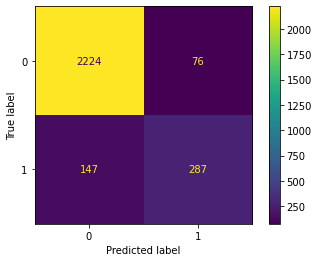

In [70]:
sklm.plot_confusion_matrix(svm_lin_CV, feat_test, resp_test['Volcano?'])
plt.show()

In [71]:
y_test_pred_lin_CV = svm_lin_CV.predict(feat_test)


print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_lin_CV))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_lin_CV))

0.9184345281638625
0.7202007528230865


In [ ]:
param_rbf = [{'C': [ 0.1,1], 'gamma': [ 0.1,1,10]}] 

svm_rbf_s_CV = GridSearchCV(SVC(kernel = 'rbf'), param_grid = param_rbf, cv = 3, scoring = 'accuracy', verbose = 3)

svm_rbf_s_CV.fit(feat, resp['Volcano?'])

In [56]:
svm_rbf_s_CV.best_estimator_

SVC(C=0.1, gamma=0.1)

In [57]:
y_test_pred_lin_rbf= svm_rbf_s_CV.predict(feat_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


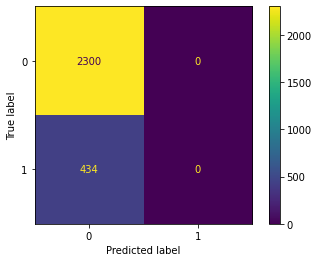

In [58]:
sklm.plot_confusion_matrix(svm_rbf_s_CV, feat_test, resp_test['Volcano?'])
plt.show()

In [59]:

print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_lin_rbf))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_lin_rbf))

0.8412582297000731
0.0


In [ ]:
param_poly = [{'C': [0.01, 0.1], 'gamma': [ 0.01, 0.1], 'coef0': [ -1, 1],'degree': [3, 4]}]

svm_poly_CV = GridSearchCV(SVC(kernel = 'poly'), param_grid = param_poly, cv = 3, scoring = 'accuracy', verbose = 4)

svm_poly_CV.fit(feat, resp['Volcano?'])

In [5]:
svm_poly_CV.best_estimator_

SVC(C=0.01, coef0=-1, gamma=0.01, kernel='poly')

In [6]:
y_test_pred_lin_polly= svm_poly_CV.predict(feat_test)

In [7]:


print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_lin_polly))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_lin_polly))

0.9250182882223847
0.7503045066991474


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


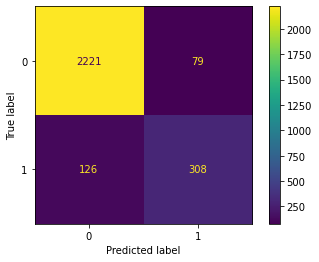

In [8]:
sklm.plot_confusion_matrix(svm_poly_CV, feat_test, resp_test['Volcano?'])
plt.show()



*   Agora iremos avaliar nossos classificadores a partir das imagens restauradas. São as mesmas imagens, porém usaremos alguns métodos para tentar melhoras nossas imagens.






###   O Primeiro método será o ` Histogram of Oriented Gradients`.



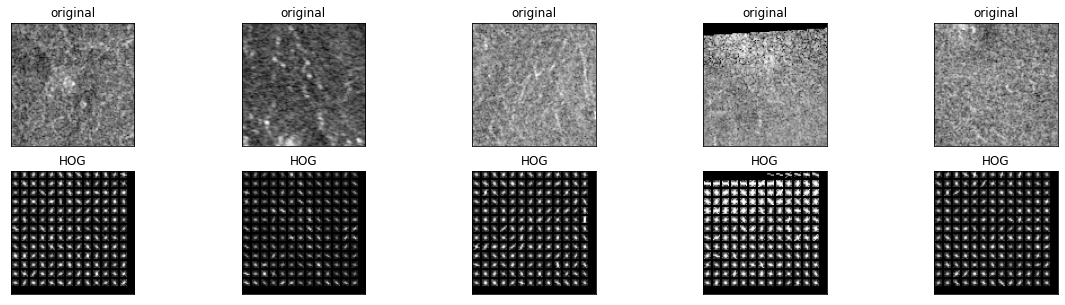

In [7]:
n = 5
plt.figure(figsize=(20, 5))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  img = np.array(feat.iloc[i]).reshape((110,110))
  plt.imshow(img)
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  img = np.array(feat.iloc[i]).reshape((110,110))
  fd, hog_image = hog(img, orientations=10, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True, multichannel=None)
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  plt.imshow(hog_image_rescaled)
  plt.title("HOG")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
feat_hog = np.zeros((feat.shape))
for i in range(feat.shape[0]):    
    img = np.array(feat.iloc[i]).reshape((110,110))
    fd, hog_image = hog(img, orientations=10, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True, multichannel=None)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    feat_hog[i] = ((hog_image_rescaled).flatten())
feat_hog = pd.DataFrame(feat_hog)

In [ ]:
feat_hog_test = np.zeros((feat_test.shape))
for i in range(feat_test.shape[0]):    
    img = np.array(feat_test.iloc[i]).reshape((110,110))
    fd, hog_image = hog(img, orientations=10, pixels_per_cell=(8, 8),cells_per_block=(1, 1), visualize=True, multichannel=None)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    feat_hog_test[i] = ((hog_image_rescaled).flatten())
feat_hog_test = pd.DataFrame(feat_hog_test)



*   Usando os classificadores:



In [25]:
NB_clf.fit(feat_hog, resp['Volcano?'])
LDA_clf.fit(feat_hog, resp['Volcano?'])
QDA_clf.fit(feat_hog, resp['Volcano?'])

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [26]:
print(NB_clf.score(feat_hog_test,resp_test['Volcano?']))
print(LDA_clf.score(feat_hog_test, resp_test['Volcano?']))
print(QDA_clf.score(feat_hog_test, resp_test['Volcano?']))

0.8412582297000731
0.555596196049744
0.18178493050475494




*   Avaliando as métricas:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


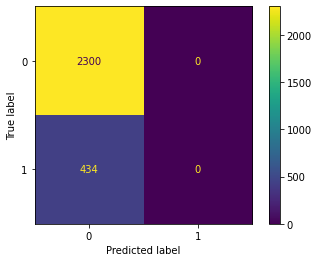

In [52]:
sklm.plot_confusion_matrix(NB_clf, feat_hog_test, resp_test['Volcano?'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


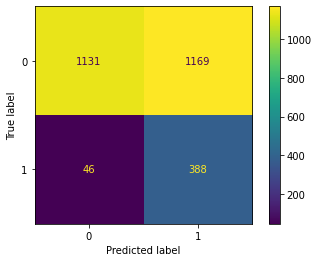

In [53]:
sklm.plot_confusion_matrix(LDA_clf, feat_hog_test, resp_test['Volcano?'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


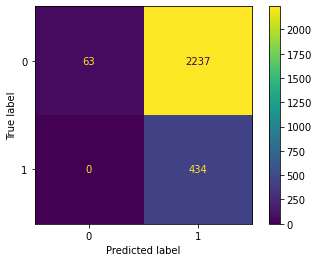

In [54]:
sklm.plot_confusion_matrix(QDA_clf, feat_hog_test, resp_test['Volcano?'])
plt.show()



*   Analisando em um contexto geral, podemos ver que o não houve uma melhora significativa, os números de falso negativos permaneceram basicamente os mesmo e temos um piora com relação ao número de verdeiros positivos, o que também é ruim.



In [86]:
svc_linear.fit(feat_hog,resp['Volcano?'])


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [90]:
y_test_pred_hog_linear = svc_linear.predict(feat_hog_test)
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_hog_linear))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_hog_linear))

0.8891733723482077
0.6353790613718412


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


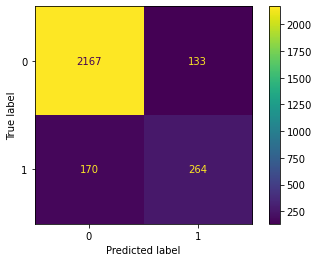

In [91]:
sklm.plot_confusion_matrix(svc_linear, feat_hog_test, resp_test['Volcano?'])
plt.show()

In [60]:
svm_rbf = SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)
svm_rbf.fit(feat_hog, resp['Volcano?'])

SVC(C=0.1, gamma=0.1)

In [74]:
y_test_pred_hog_rbf = svm_rbf.predict(feat_hog_test)
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_hog_rbf))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_hog_rbf))

0.8412582297000731
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


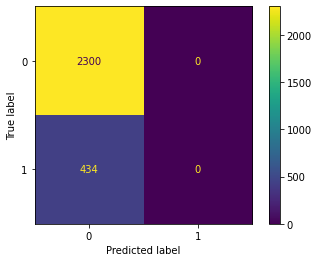

In [62]:
sklm.plot_confusion_matrix(svm_rbf, feat_hog_test, resp_test['Volcano?'])
plt.show()

In [14]:
svm_poly = SVC(kernel = 'poly', C = 0.01,degree = 3)
svm_poly.fit(feat_hog,resp['Volcano?'])


SVC(C=0.01, kernel='poly')

In [15]:
y_test_pred_hog_poly = svm_poly.predict(feat_test)
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_hog_poly))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_hog_poly))

0.8368690563277249
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


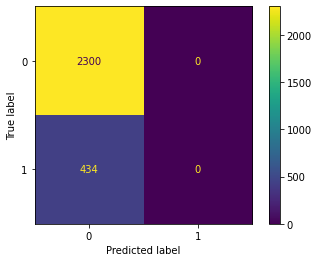

In [16]:
sklm.plot_confusion_matrix(svm_poly, feat_hog_test, resp_test['Volcano?'])
plt.show()



*   Podemos ver como visto nos outros métodos, que a mudança para um novo formato de imagem, visando uma melhro detecção dos vulcões não aperentou ser uma boa ideia, pois os resultados não foram satisfatorios e até pioraram.





###   O segundo método será o `Filling holes `.



In [9]:
feat = pd.read_csv('drive/My Drive/Colab Notebooks/Redes_neurais/features.csv',header = None)

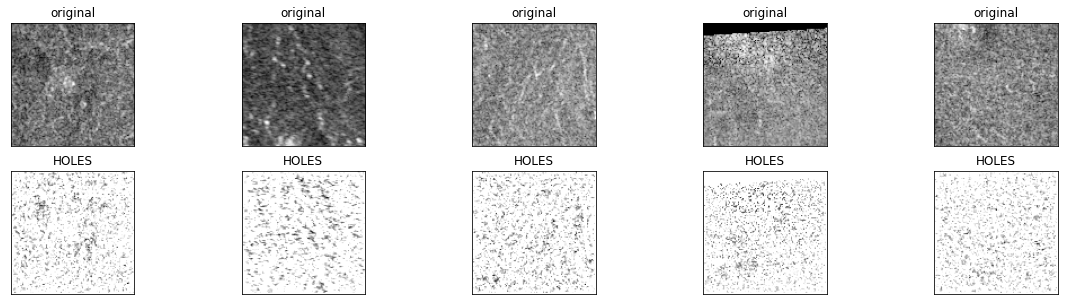

In [10]:
n = 5
plt.figure(figsize=(20, 5))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  img = np.array(feat.iloc[i]).reshape((110,110))
  plt.imshow(img)
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  img = np.array(feat.iloc[i]).reshape((110,110))
  image = rescale_intensity(img, in_range=(50, 200))
  seed = np.copy(image)
  seed[1:-1, 1:-1] = image.max()
  mask = image

  filled = reconstruction(seed, mask, method='erosion')
  plt.imshow(image-filled)
  plt.title("HOLES")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
feat_holes = np.zeros((feat.shape))
for i in range(feat.shape[0]):    
    img = np.array(feat.iloc[i]).reshape((110,110))
    image = rescale_intensity(img, in_range=(50, 200))
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.max()
    mask = image
    filled = reconstruction(seed, mask, method='erosion')
    feat_holes[i] = ((image-filled).flatten())
feat_holes = pd.DataFrame(feat_holes)


In [ ]:
feat_holes_test = np.zeros((feat_test.shape))
for i in range(feat_test.shape[0]):    
    img = np.array(feat_test.iloc[i]).reshape((110,110))
    image = rescale_intensity(img, in_range=(50, 200))
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.max()
    mask = image
    filled = reconstruction(seed, mask, method='erosion')
    feat_holes_test[i] = ((image-filled).flatten())
feat_holes_test = pd.DataFrame(feat_holes_test)


In [69]:
NB_clf.fit(feat_holes, resp['Volcano?'])
LDA_clf.fit(feat_holes, resp['Volcano?'])
QDA_clf.fit(feat_holes, resp['Volcano?'])

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [70]:
print(NB_clf.score(feat_holes_test,resp_test['Volcano?']))
print(LDA_clf.score(feat_holes_test, resp_test['Volcano?']))
print(QDA_clf.score(feat_holes_test, resp_test['Volcano?']))

0.7201901975128018
0.8174835405998537
0.6276517922457937


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


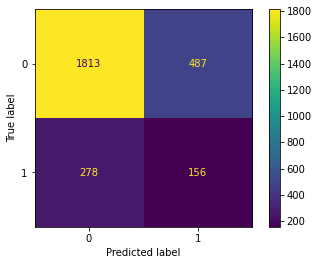

In [72]:
sklm.plot_confusion_matrix(NB_clf, feat_holes_test, resp_test['Volcano?'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


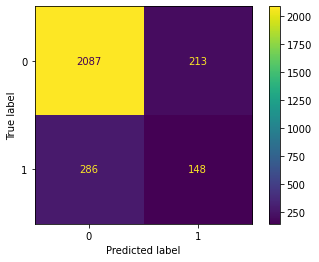

In [73]:
sklm.plot_confusion_matrix(LDA_clf, feat_holes_test, resp_test['Volcano?'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


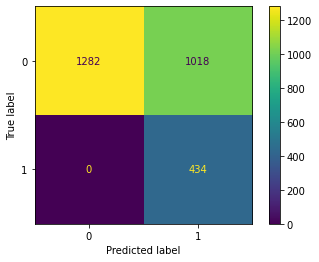

In [75]:
sklm.plot_confusion_matrix(QDA_clf, feat_holes_test, resp_test['Volcano?'])
plt.show()



*   Podemos ver que, assim como tinhamos visto acima, mais uma vez tentar melhorar as imagens, não apresentou uma melhora signigicativa nos nossos resultados. Continuamos com o método ` QuadraticDiscriminantAnalysis`, apresentando o menor números de falso negativo, o que aferir como uma boa avaliação, porém o mesmo apresenta o menor número em verdadeiro negativo, o que é ruim.



In [92]:
svc_linear.fit(feat_holes,resp['Volcano?'])


LinearSVC()

In [93]:
y_test_pred_holes_linear = svc_linear.predict(feat_holes_test)
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_holes_linear))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_holes_linear))

0.8485735186539868
0.4450402144772118


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


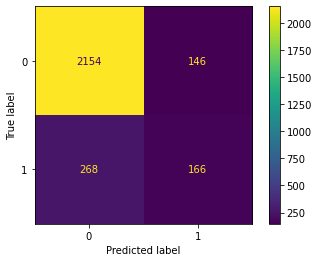

In [95]:
sklm.plot_confusion_matrix(svc_linear, feat_holes_test, resp_test['Volcano?'])
plt.show()

In [76]:
svm_rbf = SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)
svm_rbf.fit(feat_holes, resp['Volcano?'])

SVC(C=0.1, gamma=0.1)

In [77]:
y_test_pred_holes_rbf = svm_rbf.predict(feat_holes_test)
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_holes_rbf))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_holes_rbf))

0.8412582297000731
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


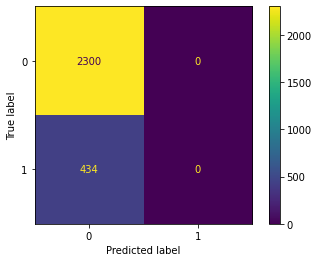

In [78]:
sklm.plot_confusion_matrix(svm_rbf, feat_holes_test, resp_test['Volcano?'])
plt.show()

In [68]:
svm_poly = SVC(kernel = 'poly', C = 0.01,degree = 3)
svm_poly.fit(feat_holes,resp['Volcano?'])

SVC(C=0.01, kernel='poly')

In [79]:
y_test_pred_holes_poly = svm_poly.predict(feat_holes_test)
print(metrics.accuracy_score(resp_test['Volcano?'], y_test_pred_holes_poly))
print(metrics.f1_score(resp_test['Volcano?'], y_test_pred_holes_poly))

0.8412582297000731
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


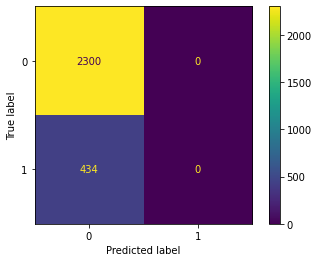

In [80]:
sklm.plot_confusion_matrix(svm_poly, feat_holes_test, resp_test['Volcano?'])
plt.show()

Podemos ver que os metodos SVM, nao performaram bem, tivemos uma piora significativa com relação a matriz de confusão.




### Conclusão

Para o caso binário, podemos inferir após essa séria de analises feitas com diversos classificadores e com algumas tecnicas aplicadas na imagem. Que levando em consideração a métrica que o classificador que tiver o menor número de falsos negativos, indicar que a imagem não apresenta vulcão, porém a mesma apresenta ao menos um, seria o melhor. Mesmo a performace não sendo muito boa em todos os cenários, podemos inferir que o `Quadratic discrimitant analisis`, treinado no conjunto de imagem que naão apresenta nenhuma modificação com relação a oroginal, foi o menor nesse quesito.






## 2.   Classificação Multiclasse





*   Nesta etapa, iremos analisar classificadores a partir das imagens que temos e que já sabemos que apresentam ao menos um vulcão, qual seria o tipo(`Type`) de desse vulcão





*   Inicialmente, pegaremos no dataframe `feat` e no `feat_test` as imagens que sabemos que apresenta vulcões.




In [9]:
feat_on = feat.iloc[resp.loc[resp['Volcano?'] == 1].index]
feat_test_on = feat_test.iloc[resp_test.loc[resp_test['Volcano?'] == 1].index]
resp_on = resp[resp['Volcano?']==1]['Type']
resp_test_on = resp_test[resp_test['Volcano?']==1]['Type']
feat_hog_on = feat_hog.iloc[resp.loc[resp['Volcano?'] == 1].index]
feat_holes_on = feat_holes.iloc[resp.loc[resp['Volcano?'] == 1].index]
feat_hog_test_on = feat_hog_test.iloc[resp_test.loc[resp_test['Volcano?'] == 1].index]
feat_holes_test_on = feat_holes_test.iloc[resp_test.loc[resp_test['Volcano?'] == 1].index]


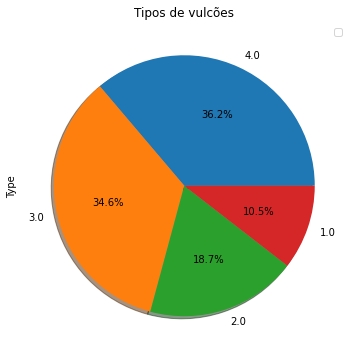

In [10]:
resp[resp['Volcano?']==1]['Type'].value_counts().plot(
    kind = 'pie', figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.title('Tipos de vulcões')
plt.legend([])
plt.show()



*   Podemos ver que os dados se mostram um pouco desbalanceados.




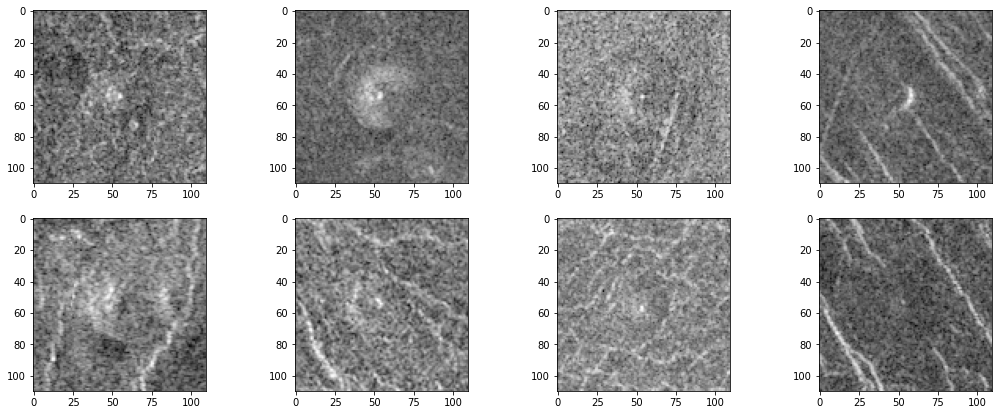

In [11]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(18, 7)
ind = 0

for ax in axs.flat:
    img = np.array(feat_on.iloc[ind]).reshape((110,110))
    ax.imshow(img, cmap = 'gray')
    ind += 1



*   Para os classicadores Multiclasses, usaremos os `OneVsOneClassifier` `OneVsRestClassifier`.



In [10]:
ovo_clf = OneVsOneClassifier(SVC(kernel = 'linear'))
ovr_clf = OneVsRestClassifier(SVC(kernel = 'linear'))


In [13]:
ovo_clf.fit(feat_on, resp_on)
ovr_clf.fit(feat_on,resp_on)
LDA_clf.fit(feat_on, resp_on)
QDA_clf.fit(feat_on, resp_on)
NB_clf.fit(feat_on,resp_on)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GaussianNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


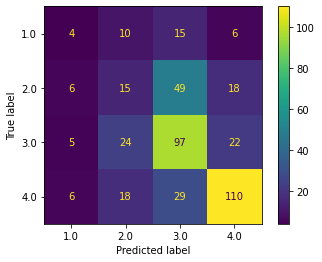

In [12]:
sklm.plot_confusion_matrix(ovo_clf, feat_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


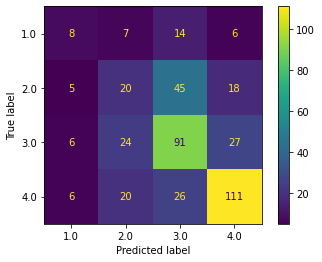

In [14]:
sklm.plot_confusion_matrix(ovr_clf, feat_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


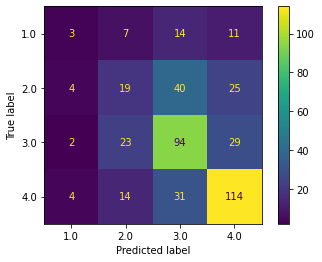

In [15]:
sklm.plot_confusion_matrix(LDA_clf, feat_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


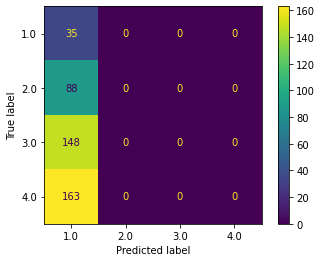

In [32]:
sklm.plot_confusion_matrix(QDA_clf, feat_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


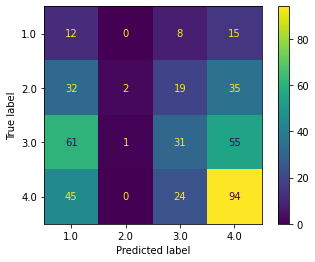

In [18]:
sklm.plot_confusion_matrix(NB_clf, feat_test_on, resp_test_on)

In [19]:

ovo_clf.fit(feat_hog_on, resp_on)
ovr_clf.fit(feat_hog_on,resp_on)
LDA_clf.fit(feat_hog_on, resp_on)
QDA_clf.fit(feat_hog_on, resp_on)
NB_clf.fit(feat_hog_on,resp_on)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GaussianNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


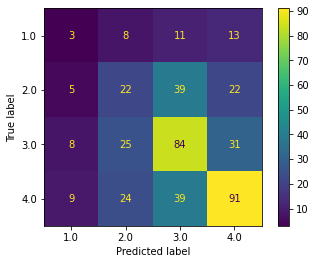

In [20]:
sklm.plot_confusion_matrix(ovo_clf, feat_hog_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


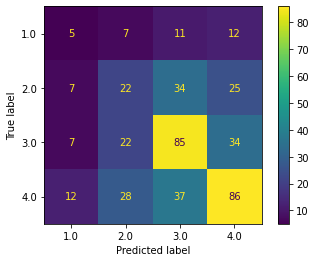

In [21]:
sklm.plot_confusion_matrix(ovr_clf, feat_hog_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


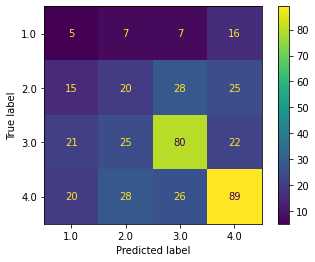

In [22]:
sklm.plot_confusion_matrix(LDA_clf, feat_hog_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


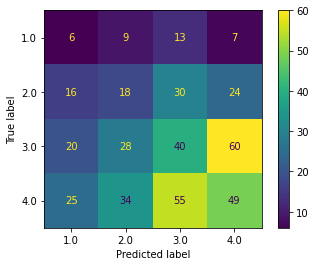

In [23]:
sklm.plot_confusion_matrix(QDA_clf, feat_hog_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


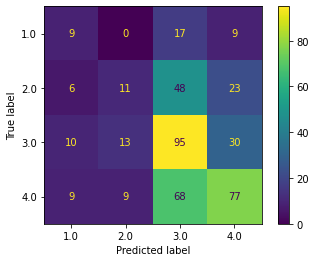

In [24]:
sklm.plot_confusion_matrix(NB_clf, feat_hog_test_on, resp_test_on)

In [33]:

ovo_clf.fit(feat_holes_on, resp_on)
ovr_clf.fit(feat_holes_on,resp_on)
LDA_clf.fit(feat_holes_on, resp_on)
QDA_clf.fit(feat_holes_on, resp_on)
NB_clf.fit(feat_holes_on,resp_on)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


GaussianNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


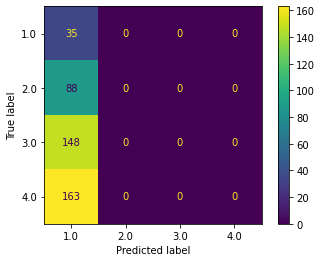

In [26]:
sklm.plot_confusion_matrix(ovo_clf, feat_holes_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


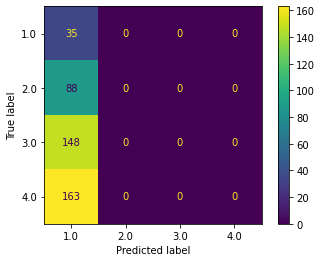

In [27]:
sklm.plot_confusion_matrix(ovr_clf, feat_holes_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


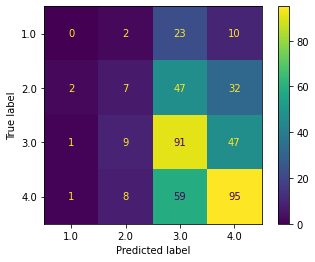

In [28]:
sklm.plot_confusion_matrix(LDA_clf, feat_holes_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


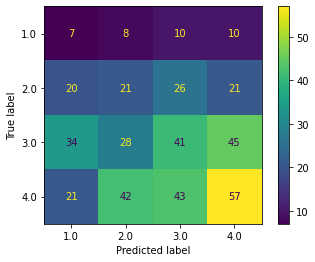

In [29]:
sklm.plot_confusion_matrix(QDA_clf, feat_holes_test_on, resp_test_on)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


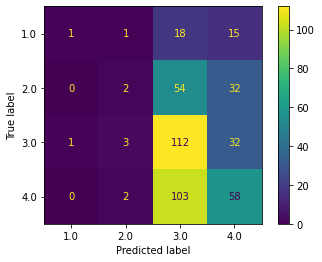

In [30]:
sklm.plot_confusion_matrix(NB_clf, feat_holes_test_on, resp_test_on)



*   Analisando pela matriz de confunsão, temos que o melhor classificador sendo o Ovr, pois tem um número melhor de verdadeiros positivos, porém  não um numero muito bom e ainda assim o mesmo classificador apresenta um alto número de falsos negativos. Temos também que as aplicações de alguns restauradores na imagens, nesse contexto, ocasionou uma piora significativa nas métricas.



#### Conclusão 

Temos que no cenário de classificacão multiclasse, o método do Ovr apresentou o melhor número de acertos, principalmente nas imagens em que não podificamos. Nas imagens modificadas o que resultados foi um pouco pior.